In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from  imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

In [3]:
# Creating the data frame
framingham = pd.read_csv('framingham.csv')
framingham.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<AxesSubplot: xlabel='education', ylabel='count'>

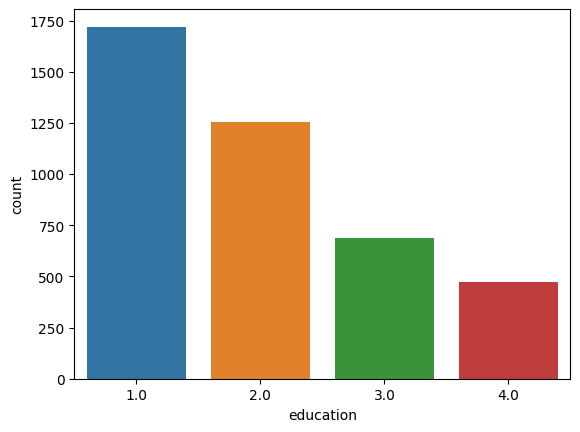

In [4]:
# Understand education of participants
sns.countplot(x='education',data=framingham)

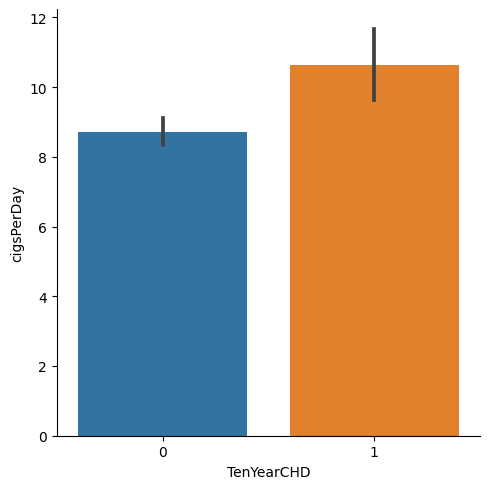

In [5]:
# Visualing smoking risk factor
sns.catplot(x='TenYearCHD',y='cigsPerDay',kind='bar',data=framingham)

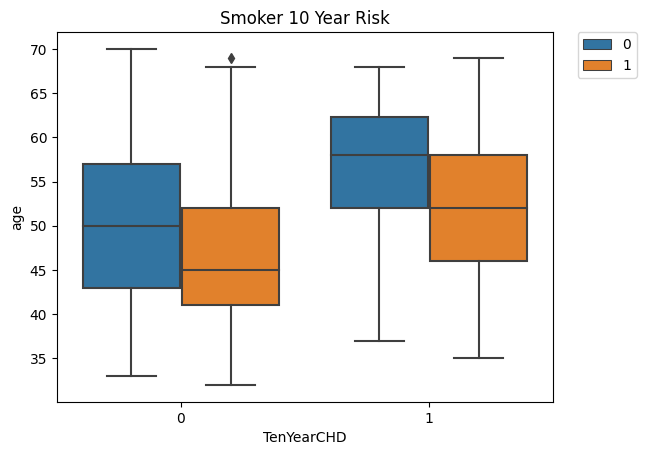

In [26]:
# Visual age and 10 year risk of CHD
sns.boxplot(x='TenYearCHD', y='age', hue='currentSmoker',
            data=framingham).set(title='Smoker 10 Year Risk')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# patients who have a ten year CHD risk smoke more cigarettes per day than those who do not.


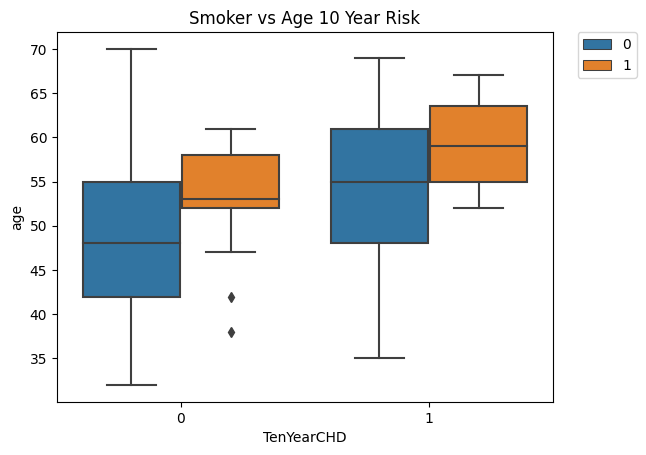

In [29]:
# Visual age , prevalent smoke and 10 year risk of CHD
sns.boxplot(x='TenYearCHD', y='age', hue='prevalentStroke',
            data=framingham).set(title='Smoker vs Age 10 Year Risk')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# older patients are more likely to develop CHD.
# Smokers seem to be at a larger risk of developing CHD at a younger age, as compared to non-smokers.


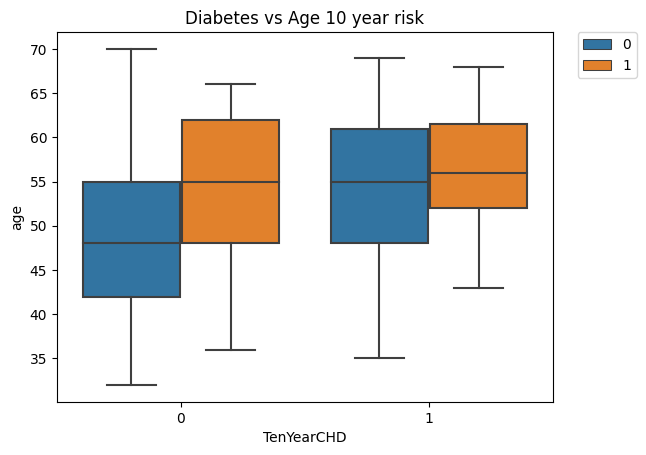

In [30]:
#  Visual age, diabetes, and ten year risk of developing CHD
sns.boxplot(x='TenYearCHD', y='age', hue='diabetes',
            data=framingham).set(title='Diabetes vs Age 10 year risk')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# older participant is more likely to have diabetes than a younger one.


(80.0, 624.35)

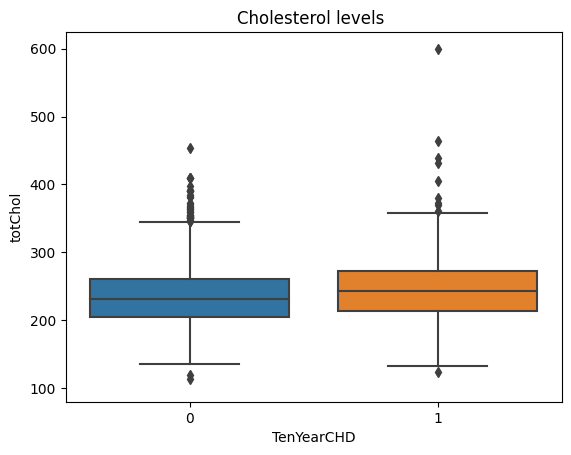

In [27]:
# total cholesterol levels
sns.boxplot(x='TenYearCHD', y='totChol',
            data=framingham).set(title='Cholesterol levels ')
plt.ylim(80)

# Patients with a ten year CHD risk have slightly higher cholesterol levels 
# than patients who don’t, though the difference is very small and not significant.


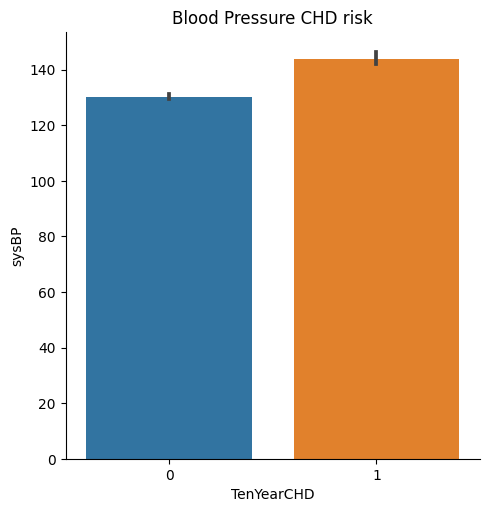

In [28]:
# Visual systolic and diastolic blood pressure
sns.catplot(x='TenYearCHD', y='sysBP', kind='bar', data=framingham).set(title='Blood Pressure CHD risk')

# Blood pressure does seem to be linked with coronary heart disease. 
# Patients with a ten year CHD risk seem to have higher blood pressure than the ones who don’t.


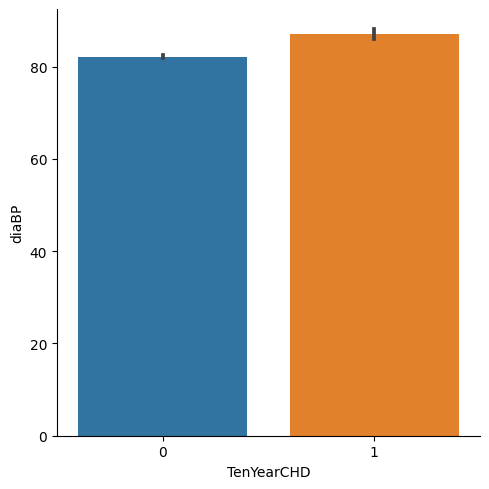

In [11]:
sns.catplot(x='TenYearCHD',y='diaBP',kind='bar',data=framingham)

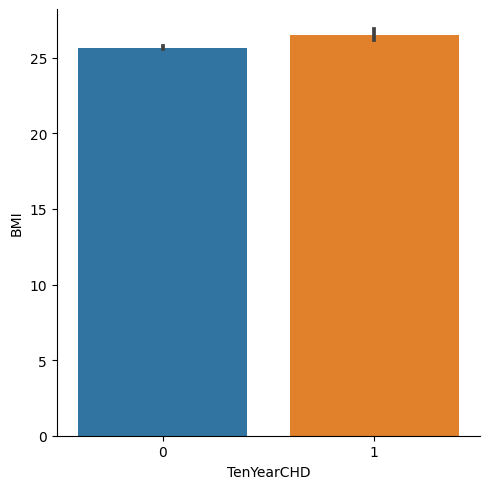

In [12]:
# Visual Obesity
sns.catplot(x='TenYearCHD',y='BMI',kind='bar',data=framingham)

# Patients with CHD are seen to have slightly higher BMI


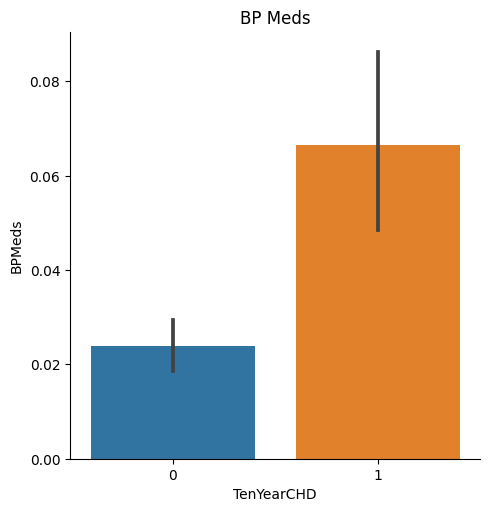

In [31]:
# BP medications
sns.catplot(x='TenYearCHD',y='BPMeds',kind='bar',data=framingham).set(title="BP Meds")

#A higher dosage of BP medications is associated with a larger ten year CHD risk.


In [14]:
# preparing model for processing 
# Checking for null values
framingham.isnull().any()
# Dropping null values
framingham = framingham.dropna()


In [15]:
# baseline class
framingham['TenYearCHD'].value_counts()


0    3101
1     557
Name: TenYearCHD, dtype: int64

In [16]:
# Baseline accuracy
3101/(3101+557)


0.8477310005467469

In [17]:
from sklearn.model_selection import train_test_split
X = framingham.drop('TenYearCHD',axis=1)
y = framingham['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35)

# data set is unbalanced, and more than 80% of the data is of participants who don’t have a ten year CHD risk

In [18]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
undersample = RandomUnderSampler(sampling_strategy='not minority')
X_under, y_under = undersample.fit_resample(X_over,y_over)
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.35)
steps = [('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

In [19]:
#fitting the data
pipeline.fit(X_train,y_train)

Pipeline(steps=[('model', DecisionTreeClassifier())])

In [20]:
#Predicitions
pipepred = pipeline.predict(X_test)

In [53]:
from sklearn.metrics import classification_report,accuracy_score
import pandas as pd
import dataframe_image as dfi

print(classification_report(y_test,pipepred))
report = classification_report(y_test,pipepred, output_dict=True)
df = pd.DataFrame(report).transpose()
dfi.export(df, "myTable.png")


              precision    recall  f1-score   support

           0       0.97      0.81      0.88      1091
           1       0.83      0.97      0.90      1080

    accuracy                           0.89      2171
   macro avg       0.90      0.89      0.89      2171
weighted avg       0.90      0.89      0.89      2171



objc[76064]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb4da77ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/107.0.5304.121/Libraries/libGLESv2.dylib (0x114fafed8). One of the two will be used. Which one is undefined.
[1204/170055.316262:INFO:headless_shell.cc(657)] Written to file /var/folders/dj/jvb37b8n4tddmtr_g0ycs3jh0000gn/T/tmpnwhz5lu8/temp.png.


In [22]:

accuracy_score(y_test,pipepred)
#The model has high precision and recall for both outcomes, and has an accuracy of 0.90, which beats the baseline.


0.8908337171810226